In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def rand(shape):
    return tf.random.normal(shape, dtype=tf.float64)

def FC(x, w, b):
    """
    Fully-connected layer
    """
    N = x.shape[0]
    D = w.shape[0]
    x_reshaped = tf.reshape(x, [N,D])
    # print(x_reshaped.shape, w.shape, tmp.shape, b.shape)
    return tf.math.add(tf.matmul(x_reshaped, w), b)

class Model(object):
    def __init__(self, input_dim=1):
        ####### NOTE ######
        # If you add vars here, need to add them in `vars_list` in `train()` a few cells down
        # Otherwise they won't be updated

        # input_shape - NxD
        h1 = 20
        self.W1 = tf.Variable(rand([input_dim,h1])) # DxH => H=20
        self.b1 = tf.Variable(rand([1,h1])) # 1xH1

        h2 = 40
        self.W2 = tf.Variable(rand([h1,h2])) # DxH => H=40
        self.b2 = tf.Variable(rand([1,h2])) # 1xH2

        self.W_last = tf.Variable(rand([h2,1])) # HxOut
        self.b_last = tf.Variable(rand([1,1]))  # 1xOut

    def __call__(self, x):
        # x is of shape NxD
        x = FC(x, self.W1, self.b1)             # [NxD]*[DxH1] + [1xH1] = [N*H1] => [Nx20] 
        x = tf.math.tanh(x)                     # [NxH1] => Nx20
        x = FC(x, self.W2, self.b2)             # [NxH1]*[H1xH2] + [1xH2] = [NxH2] => [Nx40]
        x = tf.math.tanh(x)                     # [NxH2] => Nx40
        x = FC(x, self.W_last, self.b_last)     # [NxH]*[HxO] + [1xO] = [NxO] => [Nx1]
        return x


In [3]:
def loss(target_y, predicted_y):
    return tf.math.reduce_mean(tf.math.square(target_y - predicted_y))

In [4]:
# Create data
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

dim=1
inputs  = tf.random.normal(shape=[NUM_EXAMPLES,dim], dtype=tf.float64)
noise   = tf.random.normal(shape=[NUM_EXAMPLES,1], dtype=tf.float64)
outputs = inputs**2 + inputs * TRUE_W + TRUE_b + noise

In [5]:
learning_rate=0.1
opt = tf.keras.optimizers.Adam(learning_rate)

def train(model_in, input, output):
    # Compute the gradients for a list of variables.
    with tf.GradientTape() as tape:
        curr_loss = loss(output, model_in(input))

    # print(f"Curr_loss: {curr_loss}")
    vars_list = [model_in.W1, model_in.b1, 
                model_in.W2, model_in.b2, 
                model_in.W_last, model_in.b_last]
    grads = tape.gradient(curr_loss, vars_list)

    # Ask optimizer to apply the gradients.
    opt.apply_gradients(zip(grads, vars_list))

model = Model(input_dim=dim)

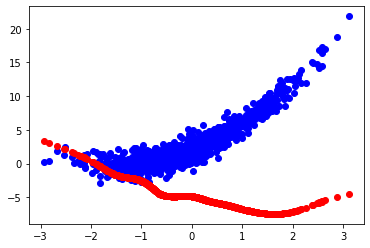

Current loss: 83.524012


In [6]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [7]:
epochs = 30

for epoch in range(epochs):
    current_loss = loss(outputs, model(inputs))

    train(model, inputs, outputs)
    print(f'Epoch {epoch}: loss={current_loss}')

Epoch 0: loss=83.52401150034135
Epoch 1: loss=69.70602220631216
Epoch 2: loss=25.962715876126037
Epoch 3: loss=7.46100341080223
Epoch 4: loss=7.489034142210961
Epoch 5: loss=10.767747780608826
Epoch 6: loss=11.993404472441604
Epoch 7: loss=10.176532516996177
Epoch 8: loss=7.06399972574256
Epoch 9: loss=4.481128832623114
Epoch 10: loss=3.471432730100098
Epoch 11: loss=3.9585540701698507
Epoch 12: loss=5.106751658479875
Epoch 13: loss=5.835645405560281
Epoch 14: loss=5.343743081501936
Epoch 15: loss=3.861976666844188
Epoch 16: loss=2.3552259485568774
Epoch 17: loss=1.6596313691729752
Epoch 18: loss=1.9546262819932736
Epoch 19: loss=2.7474400061122295
Epoch 20: loss=3.308173735010356
Epoch 21: loss=3.223995252995188
Epoch 22: loss=2.622311280694022
Epoch 23: loss=1.9452563293231915
Epoch 24: loss=1.5659981810926238
Epoch 25: loss=1.5809296080131872
Epoch 26: loss=1.8314554736230075
Epoch 27: loss=2.0395828706793373
Epoch 28: loss=2.008099859514454
Epoch 29: loss=1.7735856354707242


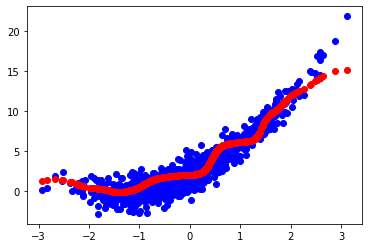

Current loss: 1.533348


In [8]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [49]:
# Let's try using Pandas now
# This is a test file
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')
df = pd.read_csv(csv_file)

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [51]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [53]:
target = df.pop('target')
# dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [54]:
# dataset
inputs = tf.convert_to_tensor(df)
outputs = tf.convert_to_tensor(target, dtype=tf.float64)

In [55]:
outputs

<tf.Tensor: shape=(303,), dtype=float64, numpy=
array([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0

In [56]:
epochs = 30
dim = 13

model = Model(input_dim=dim)
for epoch in range(epochs):
    current_loss = loss(outputs, model(inputs))

    train(model, inputs, outputs)
    print(f'Epoch {epoch}: loss={current_loss}')

Epoch 0: loss=29.352291428046822
Epoch 1: loss=26.329214129233392
Epoch 2: loss=14.003242739829977
Epoch 3: loss=3.4161553733807053
Epoch 4: loss=0.37254710826230936
Epoch 5: loss=3.098039525864788
Epoch 6: loss=5.285642870478202
Epoch 7: loss=4.173358699878882
Epoch 8: loss=1.4784286196002712
Epoch 9: loss=0.19904245260898468
Epoch 10: loss=1.2837299279434915
Epoch 11: loss=2.857666899509249
Epoch 12: loss=2.8551427935525124
Epoch 13: loss=1.430567123648392
Epoch 14: loss=0.281507128740285
Epoch 15: loss=0.5043114849844458
Epoch 16: loss=1.4898180110783679
Epoch 17: loss=1.8734922879930258
Epoch 18: loss=1.2348386421883981
Epoch 19: loss=0.3913723718524712
Epoch 20: loss=0.2519270231105239
Epoch 21: loss=0.7794808387822273
Epoch 22: loss=1.1790900029902684
Epoch 23: loss=0.9491449074481442
Epoch 24: loss=0.41472703343047523
Epoch 25: loss=0.20204415043832
Epoch 26: loss=0.4589315666653147
Epoch 27: loss=0.756540333252259
Epoch 28: loss=0.6947025554601322
Epoch 29: loss=0.3770659586797